In [2]:
#Import the necessary libraries, Modules and classifiers
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #package providing fast, flexible, and expressive data structures designed 
#to make working with “relational” or “labeled” data both easy and intuitive.
import matplotlib.pyplot as plt #for plotting different kind s of diagram
#commands in cells below the cell that outputs a plot will not affect the plot with (comment in the same line causes an error=:
%matplotlib inline 
import seaborn as sns #visualization library based on matplotlib, for statistical data visualization

#read the data from a csv-file, ensure that the  values are separated by commas otherwise you need to specify the  
#delimiter explicitly within the following load-statement
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0) #press shift+tab two times to get information about the parameters

#Let us create a deep copy of the data set for avoiding failures in plotting and other issues 
hr_data_copy=hr_data.copy()  #for demonstrating how to handle missing values (mv).

hr_data.head() #showing the first five entries, attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.describe()  # show some statistics about the attributes of the data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Skew is: -0.476360341284


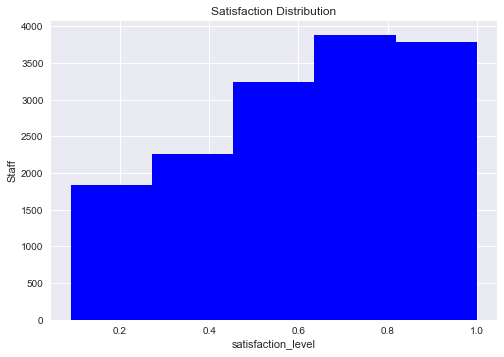

In [4]:
#First of all, let's observe the distribution of satisfaction level among our employees;
#generate metrics of skewness  and plot the histogram of the satisfaction levels
print ("Skew is:", hr_data.satisfaction_level.skew()) #*.skew() shows skewness (0=no skewness, (-)=left skewed)
#plotting the histogram:
#plt.hist needs argument "data" in form of a 1d numpy array
#We can adress columns as numpy arrays by just adding their name to the data frame (e.g. df.variable_name).
#we choose the parameter color='blue' to get blue histogram and bins=5 to fit the data to 5 pillars.
plt.hist(hr_data.satisfaction_level, color='blue',bins=5)
plt.xlabel('satisfaction_level') #naming the x-axis
plt.ylabel('Staff') #labeling the y-axis
plt.title('Satisfaction Distribution') 
# whenever we are ready with all our charts, we can display them with plt.show()
plt.show()

In [5]:
if(not hr_data.isnull().values.any()):  #Checking for NaN-values 
    print('QC (Y): Dataset does not contain missing values')
else:
    print('QC (N): Dataset contains missing values')

QC (Y): Dataset does not contain missing values


In [6]:
#for showing how to handle missing values(mv), we randomly create NaN-values inside the dataset 
import random
ix = [(row, col) for row in range(hr_data_copy.shape[0]) for col in range(hr_data_copy.shape[1])]
for row, col in random.sample(ix, int(round(.05*len(ix)))):   #sequenz in ix and integer (5% of data entries) 
       hr_data_copy.iloc[row, col] = np.nan  #are replaced by NaN-values

In [7]:
hr_data_copy.head() #showing the first five entries again with NaN-entries 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,NaN
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,NaN,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


In [8]:
hr_data_copy.describe() #just to show the mv-effect, now with error message, because of mv

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14220.000000,14238.000000,14265.000000,14258.000000,14272.000000,14269.000000,14257.000000,14212.000000
mean,0.613401,0.715829,3.804136,201.107659,3.494395,0.144439,0.238339,0.020968
std,0.248422,0.171061,1.232185,49.873250,1.453542,0.351547,0.426082,0.143283
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#there are 3 possibilities for handling missing values(mv): 1.to ignore
#2.to impute(fill)  3.to drop the datapoint with mv

In [10]:
#2. way: create an imputer-object to surrogate the NaN using a strategy-parameter
#more about imputation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
hr_no_missing_f=hr_data_copy.fillna(hr_data_copy.iloc[:10].median()) 
hr_no_missing_f.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,NaN
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,3.5,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


In [11]:
hr_no_missing_f.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.603097,0.720607,3.789253,202.213914,3.518901,0.137409,0.276018,0.019868
std,0.245858,0.167941,1.203446,48.867161,1.422028,0.344290,0.447041,0.139551
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.415000,0.570000,3.000000,158.000000,3.000000,0.000000,0.000000,0.000000
50%,0.620000,0.740000,4.000000,205.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.860000,5.000000,243.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
#3.way: drop the mv's 
hr_no_missing_d = hr_data_copy.dropna()
hr_no_missing_d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
5,0.41,0.50,2.0,153.0,3.0,0.0,1.0,0.0,sales,low
8,0.89,1.00,5.0,224.0,5.0,0.0,1.0,0.0,sales,low


In [13]:
hr_no_missing_d.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000
mean,0.613413,0.716537,3.803331,200.652082,3.507052,0.143809,0.241644,0.021988
std,0.248342,0.170890,1.232731,50.066625,1.453973,0.350915,0.428103,0.146652
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
hr_data.info() #attribut specifications, shows the datatype-information about the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
#Given that the "sales' and "salary" columns are non-numeric, we can check the number of unique levels and dummy code 
#the variables.

In [16]:
print('Departments: ', ', '.join(hr_no_missing_d['sales'].unique())) #show and join the unique entries in sales with the departments
print('Salary levels: ', ', '.join(hr_no_missing_d['salary'].unique())) #show and join the unique entries in salery with a global 
#descriptive level 

Departments:  sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD
Salary levels:  medium, low, high


In [17]:
hr_data.rename(columns={'sales':'department'}, inplace=True) #Renaming Columns, note: you do need to specify the existing label 
#first followed by the new label to rename it to afterward 
hr_data_new = pd.get_dummies(hr_data, ['department', 'salary'] ,drop_first = True) #Whether to get k-1 dummies out of k 
#categorical levels by removing the first level. New in version 0.18.0.
hr_data_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [18]:
hr_data_new.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
###Exploring the Data###

In [20]:
'''Observe that "IT" and "high" are the baseline levels for the assigned department and salary level, respectively. 
Also note that we saved the data with dummified variables as another dataframe in case we need to access the string values, 
such as for a cross-tabulation table.'''

'Observe that "IT" and "high" are the baseline levels for the assigned department and salary level, respectively. \nAlso note that we saved the data with dummified variables as another dataframe in case we need to access the string values, \nsuch as for a cross-tabulation table.'

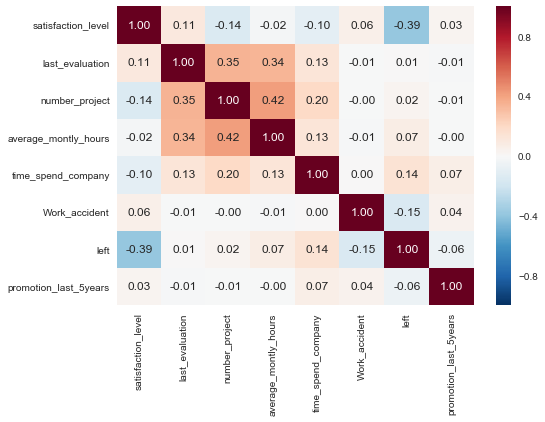

In [21]:
# Correlation matrix, we can do some basic visualizations to spot any relationships in the data
sns.heatmap(hr_data.corr(), annot=True, fmt='.2f');  #annot=False delivers heatmap without numbers;
#fmt-Parameter sets the decimal places

In [22]:
hr_data_new.columns #show the column names of new table

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [23]:
dept_table = pd.crosstab(hr_data['department'], hr_data['left'],normalize='index')
dept_table.index.names = ['Department']
dept_table

left,0,1
Department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


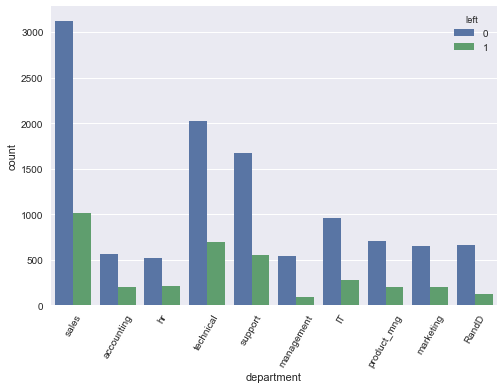

In [24]:
g=sns.countplot(x='department', hue='left', data=hr_data) #Show the number of observations 
#in each categorical bin using bars.
for item in g.get_xticklabels():  #rotate the x-axis for better reading experience
    item.set_rotation(60) # No'in brackets = degrees in positive direction

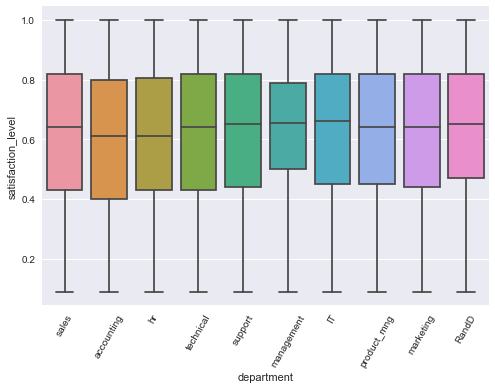

In [25]:
g=sns.boxplot(x='department', y='satisfaction_level', data=hr_data) #Draw a box plot to show 
#distributions (satisfaction level) with respect to categories (departments). A box plot (or
#box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
#comparisons between variables or across levels of a categorical variable. The box shows the 
#quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
#except for points that are determined to be #“outliers” using a method that is a function 
#of the inter-quartile range.
for item in g.get_xticklabels():  #rotate the x-axis for better reading experience
    item.set_rotation(60) # No'in brackets = degrees in positive direction

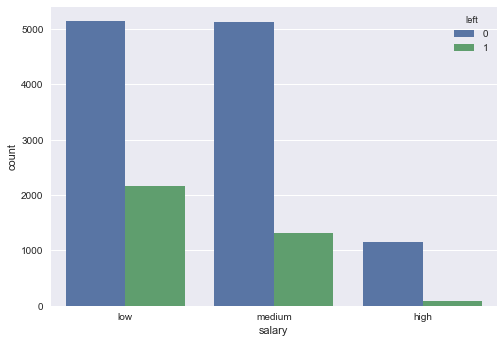

In [26]:
g=sns.countplot(x='salary', hue='left', data=hr_data) #shows the number of observations in 
#each categorical bin using bars; here: the dependecy of staying from the catagory of salaries 


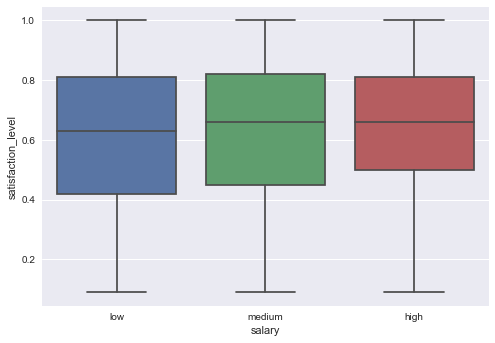

In [27]:
sns.boxplot(x='salary', y='satisfaction_level', data=hr_data) #satisfaction level with respect to salary level

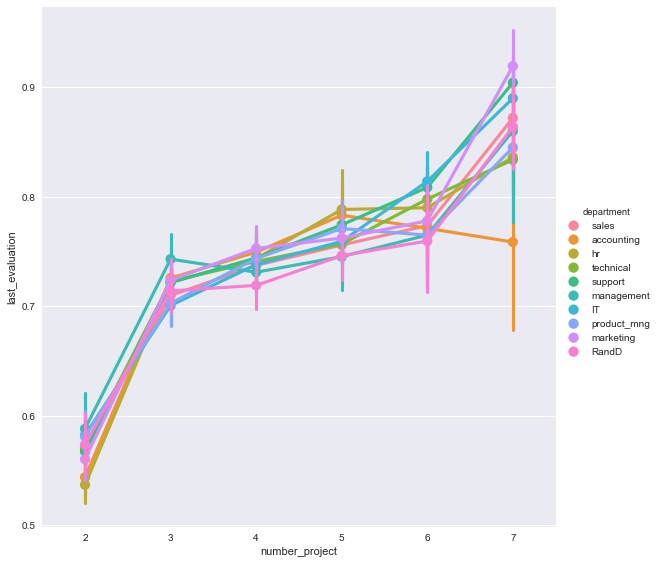

In [28]:

g=sns.factorplot(x='number_project', y='last_evaluation', hue='department', data=hr_data,size=8, aspect=1) 
#Multiple graphs on the same plot in seaborn, hue==colors in the legend, size (is the extension of x-axis) 
#and aspect ratio for better distinction 
#more information about the plot can be found: http://seaborn.pydata.org/generated/seaborn.factorplot.html

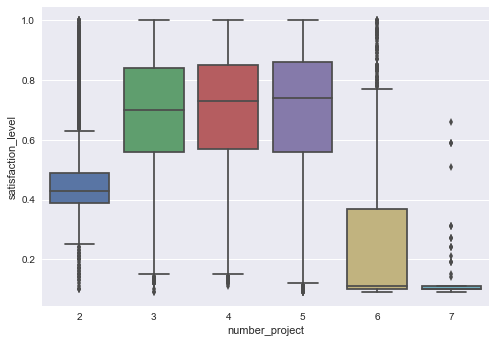

In [29]:
sns.boxplot(x='number_project', y='satisfaction_level', data=hr_data_new)

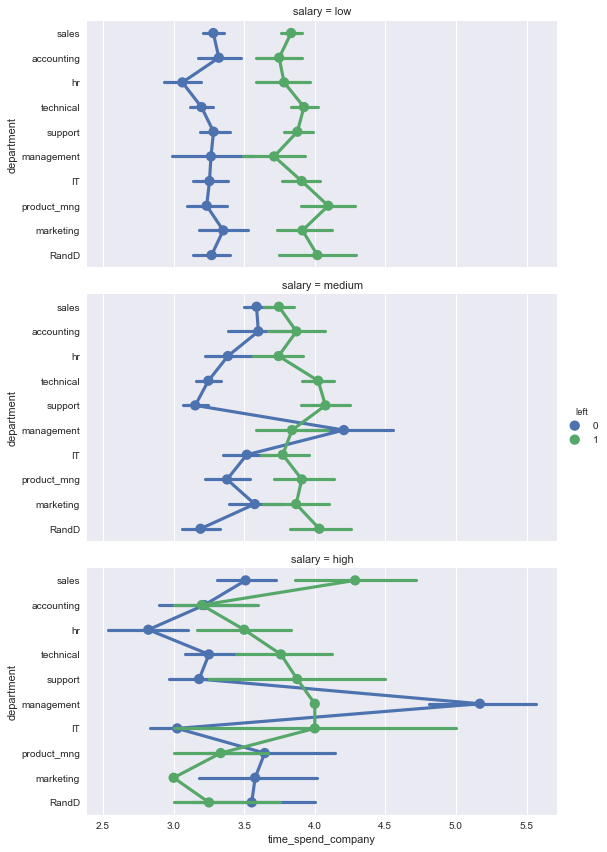

In [30]:
timeplot = sns.factorplot(x='time_spend_company', hue='left', y='department', row='salary', data=hr_data, aspect=2)

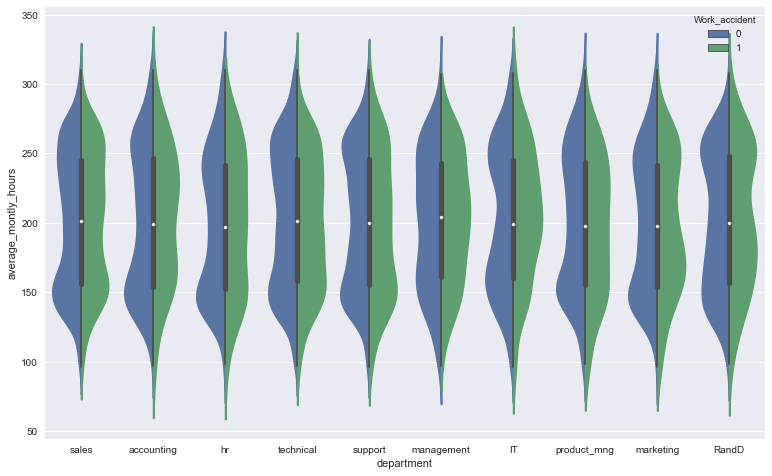

In [31]:
accidentplot = plt.figure(figsize=(10,6))
accidentplotax = accidentplot.add_axes([0,0,1,1])
accidentplotax = sns.violinplot(x='department', y='average_montly_hours', hue='Work_accident', split=True, data = hr_data, jitter = 0.47)

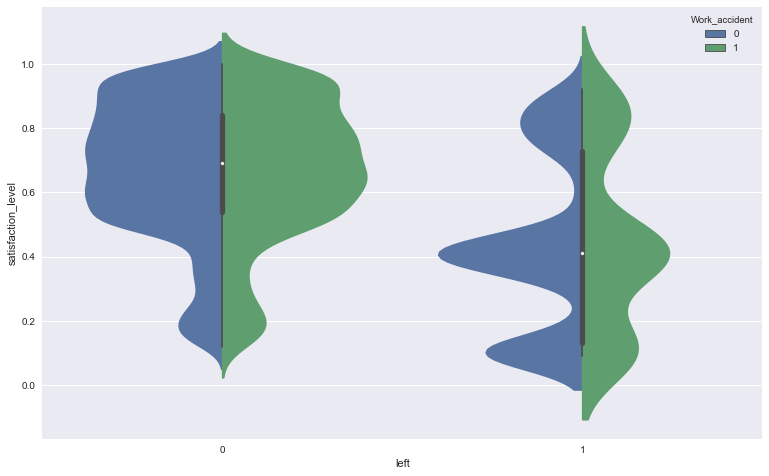

In [32]:
satisaccident = plt.figure(figsize=(10,6))
satisaccidentax = satisaccident.add_axes([0,0,1,1])
satisaccidentax = sns.violinplot(x='left', hue='Work_accident', y='satisfaction_level', split=True, data=hr_data)